<a href="https://colab.research.google.com/github/vaibhavpec2012/ECE1512---Homewrok2/blob/master/ECE_1512_Digital_Image_Processing_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***ECE 1512 Digital Image Processing - Homework 2***

---

The notebook utilizes the LUCID library and the tutorials provided by the author of [1] to study feature visualization by optimization.

### Setting up the required libraries

In [0]:
!pip install --quiet lucid==0.3
import numpy as np
import tensorflow as tf
import scipy.ndimage as nd
from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform
import time
import matplotlib.pyplot as plt
import pandas as pd

### Importing Modelzoo

---


Modelzoo is the package within Lucid containing some of the most common neural architectures. For the purpose of this assignment Inception V1 trained on [2] would be extracted.

In [0]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models

In [0]:
#Extracting Inception V1
model = models.InceptionV1()
model.load_graphdef()


In [40]:
#Displaying the layers within the model
model.layers

[{'name': 'conv2d0', 'size': 64, 'type': 'conv'},
 {'name': 'conv2d1', 'size': 64, 'type': 'conv'},
 {'name': 'conv2d2', 'size': 192, 'type': 'conv'},
 {'name': 'mixed3a', 'size': 256, 'type': 'conv'},
 {'name': 'mixed3b', 'size': 480, 'type': 'conv'},
 {'name': 'mixed4a', 'size': 508, 'type': 'conv'},
 {'name': 'mixed4b', 'size': 512, 'type': 'conv'},
 {'name': 'mixed4c', 'size': 512, 'type': 'conv'},
 {'name': 'mixed4d', 'size': 528, 'type': 'conv'},
 {'name': 'mixed4e', 'size': 832, 'type': 'conv'},
 {'name': 'mixed5a', 'size': 832, 'type': 'conv'},
 {'name': 'mixed5b', 'size': 1024, 'type': 'conv'},
 {'name': 'head0_bottleneck', 'size': 128, 'type': 'conv'},
 {'name': 'nn0', 'size': 1024, 'type': 'dense'},
 {'name': 'softmax0', 'size': 1008, 'type': 'dense'},
 {'name': 'head1_bottleneck', 'size': 128, 'type': 'conv'},
 {'name': 'nn1', 'size': 1024, 'type': 'dense'},
 {'name': 'softmax1', 'size': 1008, 'type': 'dense'},
 {'name': 'softmax2', 'size': 1008, 'type': 'dense'}]

### Visualizing Neuron

---

mages are optimized to be maximally activate the centre Neuron for the first channel of different layers. Time for each optimization is noted which is further used to analyze processing times for the objective in different layers.

Layer: mixed3a
512 [230.67616]



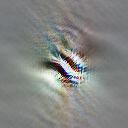

Solve time: 5.77 seconds

Layer: mixed3b
512 [578.28644]



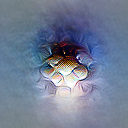

Solve time: 7.07 seconds

Layer: mixed4a
512 [2035.5137]



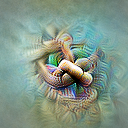

Solve time: 8.46 seconds

Layer: mixed4b
512 [2025.6957]



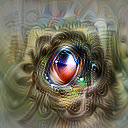

Solve time: 10.03 seconds

Layer: mixed4c
512 [2357.4744]



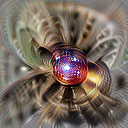

Solve time: 11.63 seconds

Layer: mixed4d
512 [1895.7551]



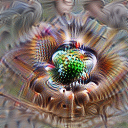

Solve time: 13.45 seconds

Layer: mixed4e
512 [929.03723]



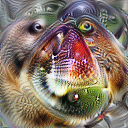

Solve time: 15.15 seconds

Layer: mixed5a
512 [1752.2256]



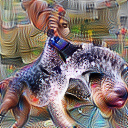

Solve time: 17.04 seconds

Layer: mixed5b
512 [589.2679]



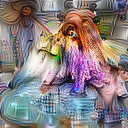

Solve time: 19.05 seconds



In [41]:
#Defining the layers to vitualize along with the image size
layers = ['mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b']
param_f = lambda: param.image(128, batch=1)
ti1 = []

#Optimizing the centre neuron of the first channel for each layer defined in 'layers'. The time for each optimization is recorded in 'ti'
for i in layers:
  print('Layer: '+i)
  t0 = time.time()
  
  obj = objectives.neuron(i, 0)
  
  _ = render.render_vis(model, obj, param_f)
  t1 = time.time()
  ti1.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

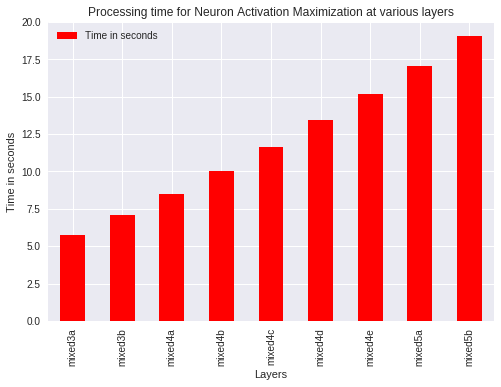

In [42]:
df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti1
    })

# a bar plot comparing processing times across layers
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ('mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b'))
plt.title("Processing time for Neuron Activation Maximization at various layers")
plt.xticks(rotation=90)
plt.show()

### Visualizing Channel

---

Images are optimized to be Maximally activate the first channel of different layers. Time for each optimization is noted which is further used to analyze processing times for the objective in different layers.

Layer: mixed3a:0
512 212.59827



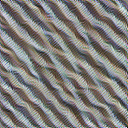

Solve time: 5.82 seconds

Layer: mixed3b:0
512 283.82928



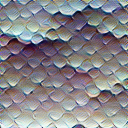

Solve time: 7.40 seconds

Layer: mixed4a:0
512 1278.1221



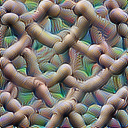

Solve time: 8.77 seconds

Layer: mixed4b:0
512 790.3213



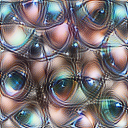

Solve time: 10.24 seconds

Layer: mixed4c:0
512 964.48663



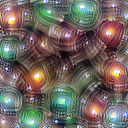

Solve time: 12.16 seconds

Layer: mixed4d:0
512 776.47736



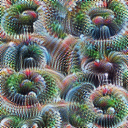

Solve time: 13.60 seconds

Layer: mixed4e:0
512 358.07074



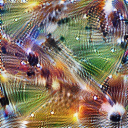

Solve time: 15.31 seconds

Layer: mixed5a:0
512 876.1781



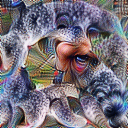

Solve time: 17.28 seconds

Layer: mixed5b:0
512 298.96844



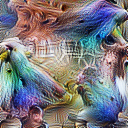

Solve time: 19.43 seconds



In [43]:
#deifining layer and channel number to be optimized
layers = ['mixed3a:0' , 'mixed3b:0', 'mixed4a:0', 'mixed4b:0', 'mixed4c:0','mixed4d:0','mixed4e:0','mixed5a:0','mixed5b:0']
ti2 = []

#Optimizing the first channel for each layer defined in 'layers'. The time for each optimization is recorded in 'ti'
for i in layers:
  print('Layer: '+i)
  t0 = time.time()
  _ = render.render_vis(model, i)
  t1 = time.time()
  ti2.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

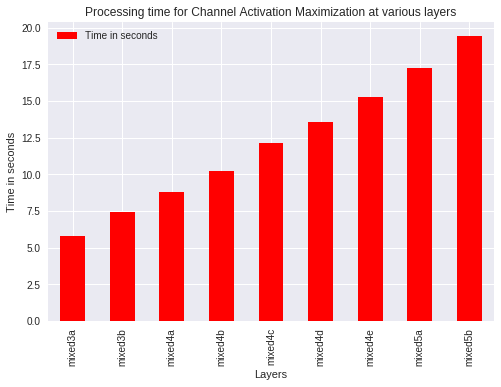

In [44]:
df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti2
    })


# a bar plot comparing processing times across layers
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ('mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b'))
plt.title("Processing time for Channel Activation Maximization at various layers")
plt.xticks(rotation=90)
plt.show()

### Visualizing Channel for minimal Activation

---

Images are optimized to Minimally activate the first channel of different layers. Time for each optimization is noted which is further used to analyze processing times for the objective in different layers.

Layer: mixed3a
512 372.04852



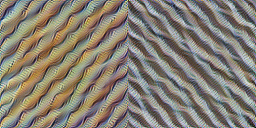

Solve time: 6.90 seconds

Layer: mixed3b
512 491.39703



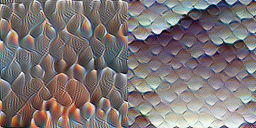

Solve time: 8.75 seconds

Layer: mixed4a
512 1637.278



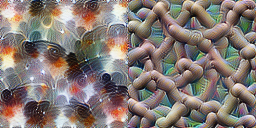

Solve time: 10.28 seconds

Layer: mixed4b
512 1334.0055



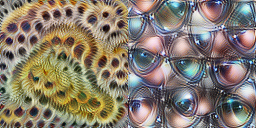

Solve time: 12.00 seconds

Layer: mixed4c
512 1668.5673



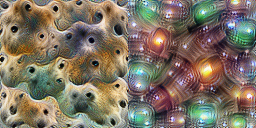

Solve time: 13.82 seconds

Layer: mixed4d
512 1064.6515



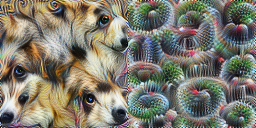

Solve time: 15.36 seconds

Layer: mixed4e
512 561.225



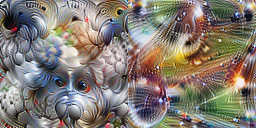

Solve time: 17.39 seconds

Layer: mixed5a
512 1407.6692



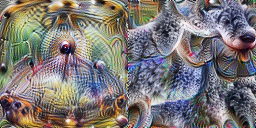

Solve time: 19.34 seconds

Layer: mixed5b
512 574.9994



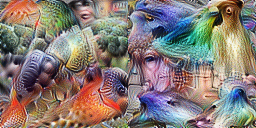

Solve time: 21.41 seconds



In [45]:
#deifining layer and channel number to be optimized
layers = ['mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b']
param_f = lambda: param.image(128, batch=2)
ti3 = []

#Optimizing the first channel for each layer defined in 'layers'. The time for each optimization is recorded in 'ti'
for i in layers:
  print('Layer: '+i)
  t0 = time.time()
  obj = objectives.channel(i+"_pre_relu", 0, batch=1) - objectives.channel(i+"_pre_relu", 0, batch=0)
  _ = render.render_vis(model, obj, param_f)
  t1 = time.time()
  ti3.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

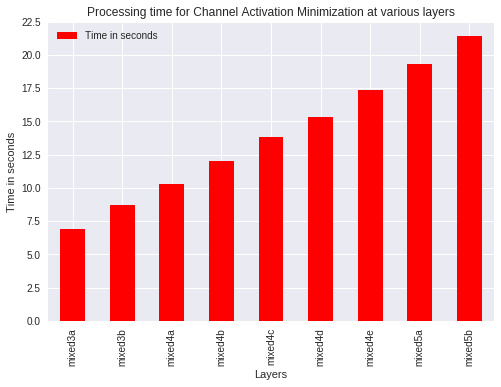

In [46]:
df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti3
    })


# a bar plot comparing processing times across layers
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ('mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b'))
plt.title("Processing time for Channel Activation Minimization at various layers")
plt.xticks(rotation=90)
plt.show()

### Neuron Interaction

---

Images are optimized to Maximally activate together the first channel of two different layers

In [0]:
#Defining the objective the size of the image
C = lambda position: objectives.channel(*position)
param_f = lambda: param.image(128, batch=1)

512 1344.2488



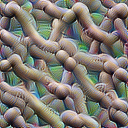

In [48]:
#Optimzing Maximum Activation together in the first channels of layer mixed3a and mixed4a respectively.
_ = render.render_vis(model, C(('mixed3a'+"_pre_relu" ,0))+C(('mixed4a'+"_pre_relu" ,0)), param_f)

512 1240.8086



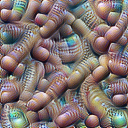

In [49]:
#Optimzing Maximum Activation together in the first channels of layer mixed4c and mixed4a respectively.
_ = render.render_vis(model, C(('mixed4c'+"_pre_relu" ,0))+C(('mixed4a'+"_pre_relu" ,0)), param_f)

512 632.03674



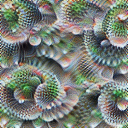

In [50]:
#Optimzing Maximum Activation together in the first channels of layer mixed3b and mixed4d respectively.
_ = render.render_vis(model, C(('mixed3b'+"_pre_relu" ,0))+C(('mixed4d'+"_pre_relu" ,0)), param_f)

512 346.59286



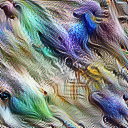

In [51]:
#Optimzing Maximum Activation together in the first channels of layer mixed3a and mixed5b respectively.
_ = render.render_vis(model, C(('mixed3a'+"_pre_relu" ,0))+C(('mixed5b'+"_pre_relu" ,0)), param_f)

### Diversity Optimization

---

Images are optimized to  activate the first channel of different layers  with varying degree to result in various facets of network. Time for each optimization is noted which is further used to analyze processing times for the objective in different layers.

Layer: mixed3a
512 112.57262



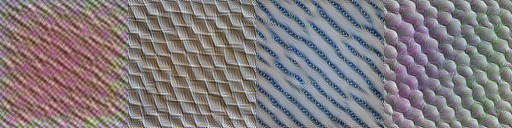

Solve time: 12.50 seconds

Layer: mixed3b
512 212.73279



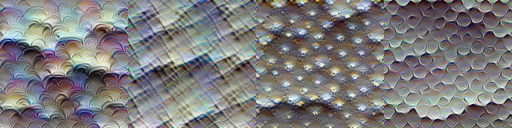

Solve time: 16.63 seconds

Layer: mixed4a
512 963.14124



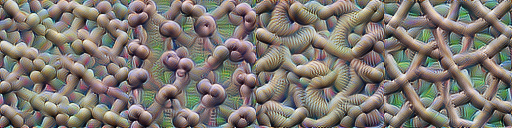

Solve time: 17.69 seconds

Layer: mixed4b
512 652.83026



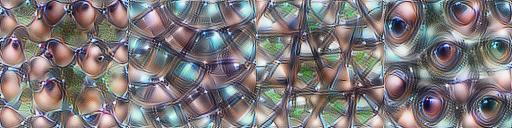

Solve time: 19.68 seconds

Layer: mixed4c
512 792.1661



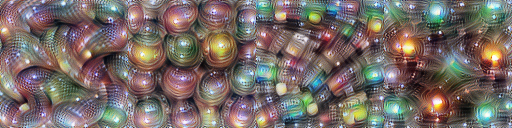

Solve time: 21.62 seconds

Layer: mixed4d
512 508.15894



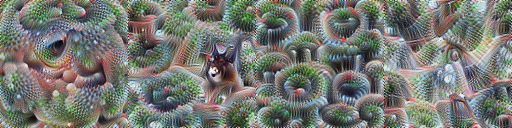

Solve time: 23.60 seconds

Layer: mixed4e
512 266.63



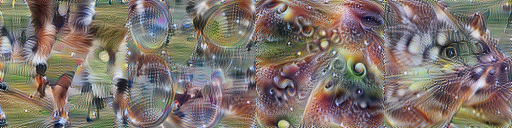

Solve time: 28.10 seconds

Layer: mixed5a
512 575.3381



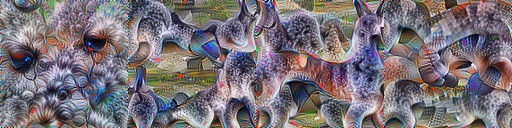

Solve time: 29.91 seconds

Layer: mixed5b
512 164.69519



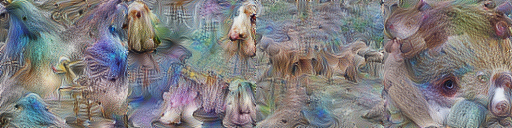

Solve time: 34.20 seconds



In [52]:
#deifining layer and channel number to be optimized
layers = ['mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b']
ti4 = []

#Optimizing the first channel for each layer defined in 'layers'. The time for each optimization is recorded in 'ti'
for i in layers:
  print('Layer: '+i)
  t0 = time.time()
  param_f = lambda: param.image(128, batch=4)
  obj = objectives.channel(i+"_pre_relu", 0) - 1e2*objectives.diversity(i)
  _ = render.render_vis(model, obj, param_f)
  t1 = time.time()
  ti4.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

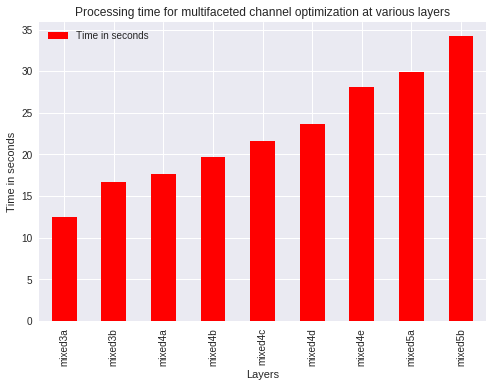

In [53]:
df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti4
    })


# a bar plot comparing processing times across layers
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ('mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b'))
plt.title("Processing time for multifaceted channel optimization at various layers")
plt.xticks(rotation=90)
plt.show()

### Feature Inversion

---

Zero Images are optimized to match the feature vectors obtained at different layers during forwad pass of the original image

In [0]:
# Feature Inversion code has been provided by the authors 

def imgToModelSize(arr):
  W = model.image_shape[0]
  w, h, _ = arr.shape
  s = float(W) / min(w,h)
  arr = nd.zoom(arr, [s, s, 1], mode="nearest")
  w, h, _ = arr.shape
  dw, dh = (w-W)//2, (h-W)//3
  return arr[dw:dw+W, dh:dh+W]

@objectives.wrap_objective
def dot_compare(layer, batch=1, cossim_pow=0):
  def inner(T):
    dot = tf.reduce_sum(T(layer)[batch] * T(layer)[0])
    mag = tf.sqrt(tf.reduce_sum(T(layer)[0]**2))
    cossim = dot/(1e-6 + mag)
    return dot * cossim ** cossim_pow
  return inner

def feature_inversion(img=None, layer=None, n_steps=512, cossim_pow=0.0):
  with tf.Graph().as_default(), tf.Session() as sess:
    img = imgToModelSize(img)
    
    objective = objectives.Objective.sum([
        1.0 * dot_compare(layer, cossim_pow=cossim_pow),
        objectives.blur_input_each_step(),
    ])

    t_input = tf.placeholder(tf.float32, img.shape)
    param_f = param.image(img.shape[0], decorrelate=True, fft=True, alpha=False)
    param_f = tf.stack([param_f[0], t_input])

    transforms = [
      transform.pad(8, mode='constant', constant_value=.5),
      transform.jitter(8),
      transform.random_scale([0.9, 0.95, 1.05, 1.1] + [1]*4),
      transform.jitter(2),
    ]

    T = render.make_vis_T(model, objective, param_f, transforms=transforms)
    loss, vis_op, t_image = T("loss"), T("vis_op"), T("input")

    tf.global_variables_initializer().run()
    for i in range(n_steps): _ = sess.run([vis_op], {t_input: img})

    result = t_image.eval(feed_dict={t_input: img})
    show(result[0])

(-0.5, 223.5, 223.5, -0.5)

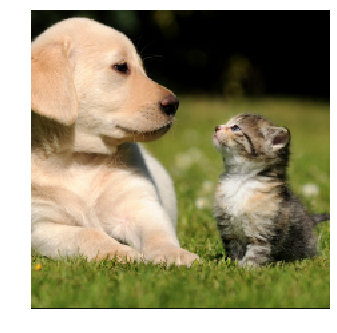

In [55]:
#Providing the Image and the layers to visualize
img = load("https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png")
layers = ['conv2d%d' % i for i in range(1, 3)] + ['mixed3a', 'mixed3b', 
                                                  'mixed4a', 'mixed4b',
                                                 'mixed4c', 'mixed4d',
                                                 'mixed4e', 'mixed5a', 'mixed5b']
plt.imshow(img)
plt.axis('off')

Layer: conv2d1



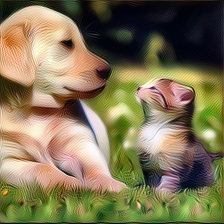

Solve time: 5.09 seconds

Layer: conv2d2



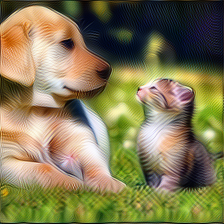

Solve time: 6.53 seconds

Layer: mixed3a



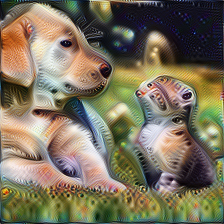

Solve time: 11.13 seconds

Layer: mixed3b



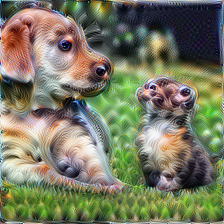

Solve time: 12.84 seconds

Layer: mixed4a



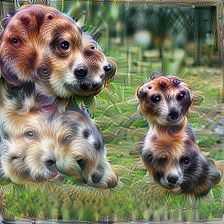

Solve time: 14.12 seconds

Layer: mixed4b



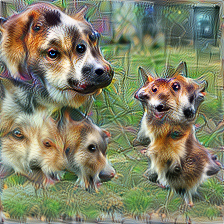

Solve time: 15.21 seconds

Layer: mixed4c



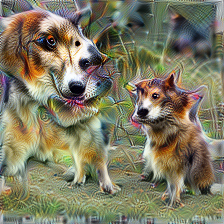

Solve time: 16.55 seconds

Layer: mixed4d



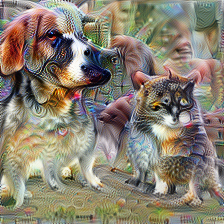

Solve time: 17.81 seconds

Layer: mixed4e



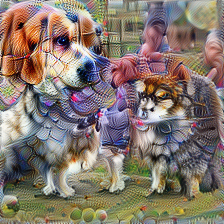

Solve time: 19.33 seconds

Layer: mixed5a



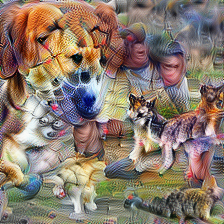

Solve time: 21.02 seconds

Layer: mixed5b



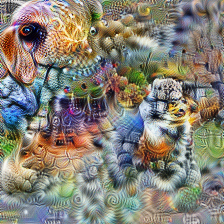

Solve time: 22.69 seconds



In [56]:
#Optimizing for each layer defined in 'layers'. The time for each optimization is recorded in 'ti'
ti5=[]
for layer in layers:
  print('Layer: '+layer)
  t0 = time.time()
  feature_inversion(img, layer=layer)
  t1 = time.time()
  if(layer !='conv2d1' and layer !='conv2d2'):
    ti5.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

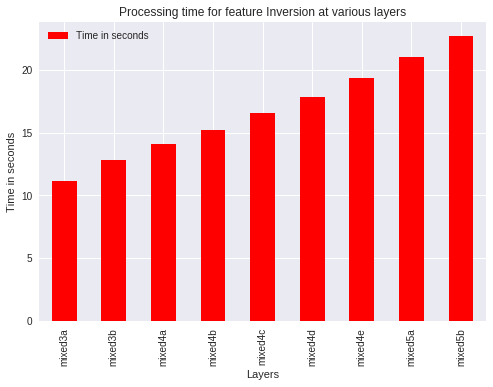

In [57]:
layers = ['mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e', 'mixed5a', 'mixed5b']
df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti5
    })


# a bar plot comparing processing times across layers
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ( 'mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e', 'mixed5a', 'mixed5b'))
plt.title("Processing time for feature Inversion at various layers")
plt.xticks(rotation=90)
plt.show()

## References

---

[1] Olah, et al., "Feature Visualization", Distill, 2017.

[2] J. Deng, W. Dong, R. Socher, L.-J. Li, K. Li, and L. Fei-Fei, “ImageNet:A Large-Scale Hierarchical Image Database,” inCVPR09, 2009.